**Считывание обучающей выборки** 

In [84]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


df_train = pd.read_csv('/kaggle/input/mai-ml-contest-1/train.csv')
df_train.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


**Посмотрим на количесво пропусков**

In [85]:
print(df_train.isnull().sum())

ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel                 530
Experience          

**Перед тем, как убрать пропуски, разделим столбец "ApplicationDate" на день, месяц, и год**

In [86]:
df_train['ApplicationDate'] = pd.to_datetime(df_train['ApplicationDate'])
df_train['ApplicationDay'] = df_train['ApplicationDate'].dt.day
df_train['ApplicationMonth'] = df_train['ApplicationDate'].dt.month
df_train['ApplicationYear'] = df_train['ApplicationDate'].dt.year
df_train = df_train.drop('ApplicationDate', axis=1)

**Заполним данные в категориальных и числовых признаках модой и среднем значением соответственно**

In [87]:
categorical_features = df_train.select_dtypes(exclude=['int64', 'float64']).columns
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns

# Заполнение в категориальных признаках модой
for feature in categorical_features:
    df_train[feature] = df_train[feature].fillna(df_train[feature].mode()[0])

# Заполнение в числовых признаках средним значением
for feature in numeric_features:
    df_train[feature] = df_train[feature].fillna(df_train[feature].mean())
    
print(df_train.isnull().sum())

Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyL

**Чтобы работать с категориальными признаки, применим one-hot-encoding**

In [88]:
df_train = pd.get_dummies(df_train, columns=categorical_features) #one-hot-encoding
column_list = df_train.columns.tolist()
print(column_list)
df_train

['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'Experience', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore', 'ApplicationDay', 'ApplicationMonth', 'ApplicationYear', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widowed', 'HomeOwnershipStatus_Mortgage', 'HomeOwnershipStatus_Other', 'HomeOwnershipStatus_Own', 'HomeOwnershipStatus_Rent', 'LoanPurpose_Auto', 'LoanPurpose_Debt Consolidation', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other', 'EmploymentStatu

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,27.000000,66829.000000,549.000000,17290.000000,60.000000,1.000000,1095.000000,0.151985,2.000000,1.000000,...,False,False,True,False,False,True,False,False,False,False
1,55.000000,172147.000000,850.000000,16110.000000,36.000000,1.000000,211.000000,0.175693,3.000000,0.000000,...,True,False,True,False,False,False,False,False,True,False
2,51.000000,300000.000000,850.000000,38436.000000,36.000000,0.000000,546.000000,0.444605,3.000000,0.000000,...,False,False,True,False,False,False,True,False,False,False
3,25.000000,34683.000000,847.000000,19186.000000,48.000000,0.000000,153.000000,0.188452,7.000000,0.000000,...,False,False,True,False,False,False,False,False,True,False
4,55.000000,300000.000000,850.000000,30437.000000,48.000000,2.000000,562.000000,0.273431,3.000000,1.000000,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,57.000000,300000.000000,850.000000,14756.000000,48.000000,2.000000,620.000000,0.477742,1.000000,3.000000,...,False,False,True,False,False,True,False,False,False,False
11013,28.000000,15000.000000,300.000000,51361.000000,96.000000,1.000000,696.000000,0.322554,2.000000,0.000000,...,True,False,True,False,False,False,True,False,False,False
11014,23.000000,15000.000000,302.000000,30724.000000,72.000000,3.000000,413.000000,0.497062,2.000000,0.000000,...,False,False,False,True,False,True,False,False,False,False
11015,39.850386,131587.872127,678.082716,29874.218306,53.439878,1.568323,546.458642,0.284397,3.033565,0.979498,...,True,False,True,False,False,False,False,False,True,False


**Посмотрим на выбросы в целевой переменной**

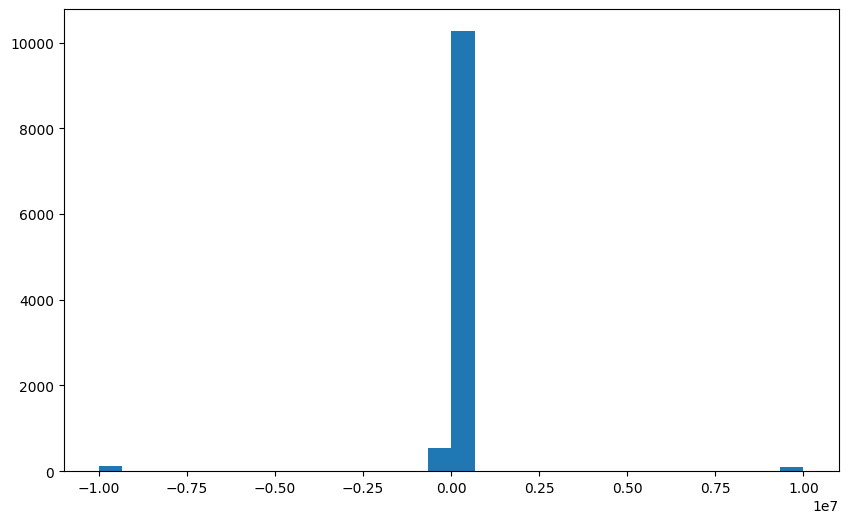

In [89]:
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.hist(df_train['RiskScore'], bins=30)
plt.show()

**Видим, что в target есть выбросы, уберем их**

In [90]:
df_train = df_train[(df_train['RiskScore'] >= 0) & (df_train['RiskScore'] <= 100)]

**Посмотрим на корреляцию признаков**

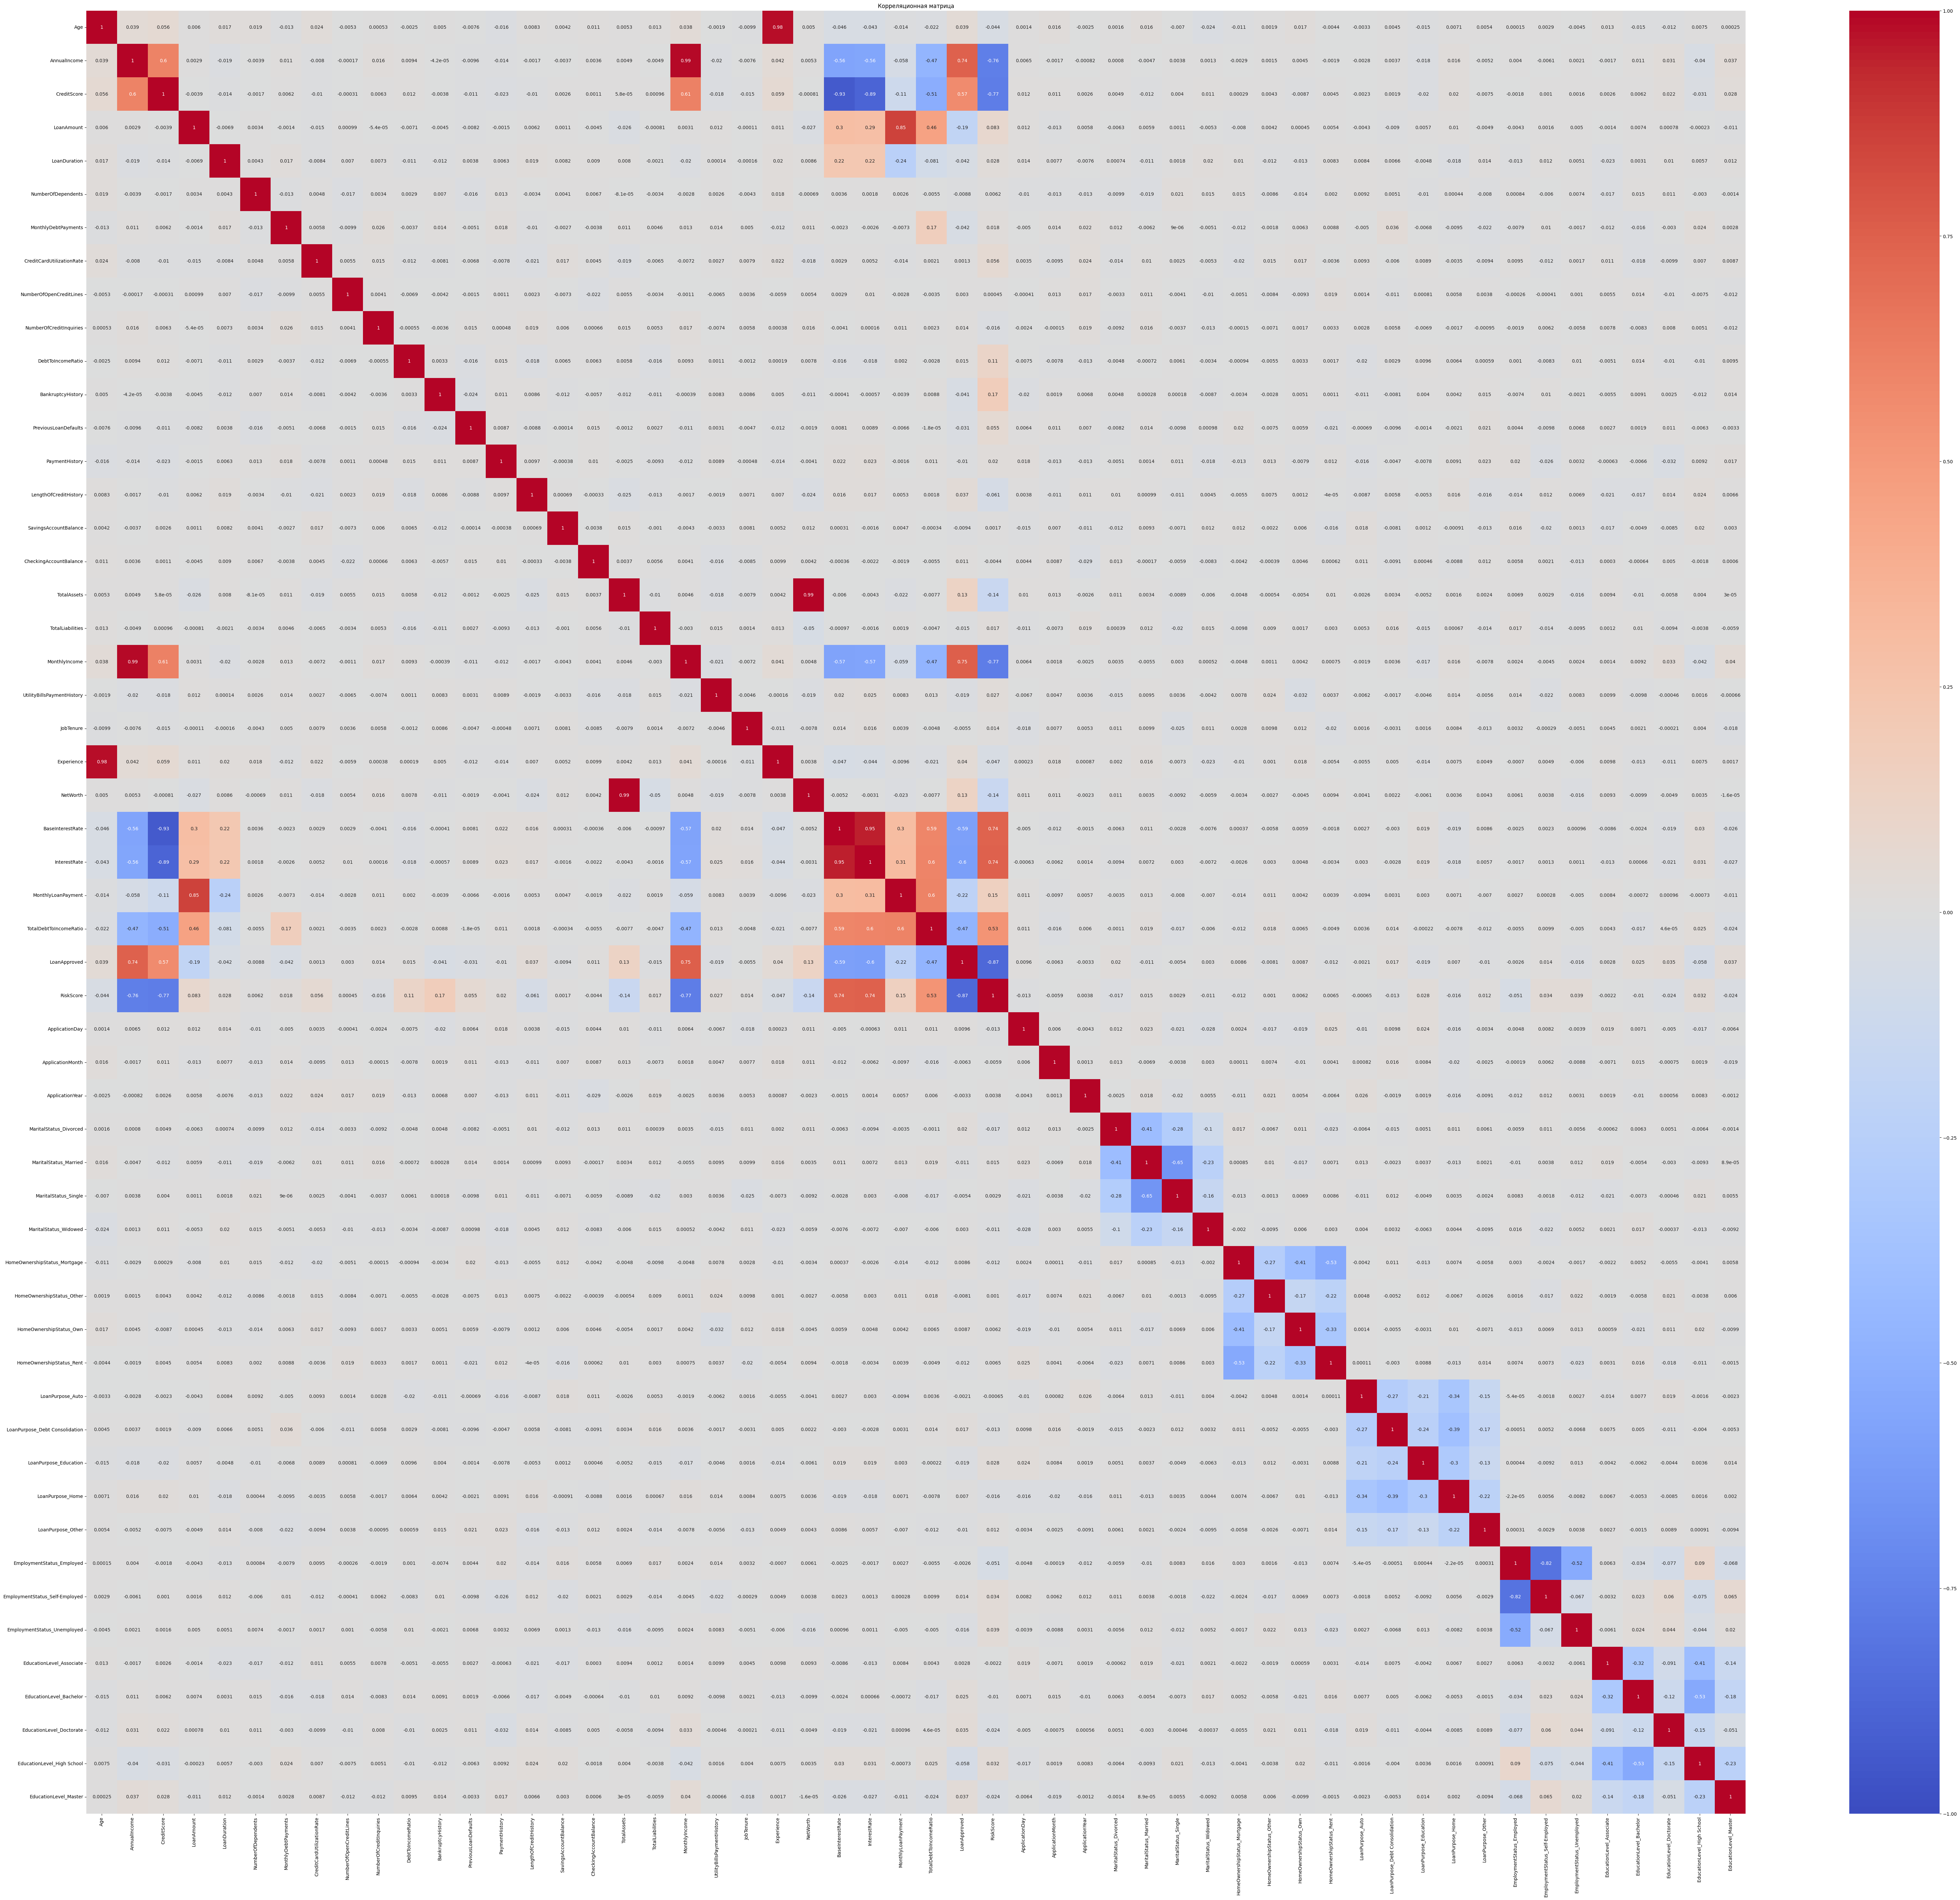

In [91]:
# Визуализация матрицы корреляций с помощью тепловой карты
corr_matrix = df_train.corr()
plt.figure(figsize=(80, 70))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

**Видим, что корреляция есть, но ее не так много. Посмотрим на корреляцию признаков только с target**

In [92]:
correlations_with_target = df_train.corr()['RiskScore'].sort_values(ascending=False).drop('RiskScore')
print(correlations_with_target)

InterestRate                      0.742634
BaseInterestRate                  0.741205
TotalDebtToIncomeRatio            0.530729
BankruptcyHistory                 0.173462
MonthlyLoanPayment                0.150830
DebtToIncomeRatio                 0.110862
LoanAmount                        0.083016
CreditCardUtilizationRate         0.056063
PreviousLoanDefaults              0.054959
EmploymentStatus_Unemployed       0.038629
EmploymentStatus_Self-Employed    0.033868
EducationLevel_High School        0.032203
LoanDuration                      0.028269
LoanPurpose_Education             0.027726
UtilityBillsPaymentHistory        0.026535
PaymentHistory                    0.019917
MonthlyDebtPayments               0.017943
TotalLiabilities                  0.017198
MaritalStatus_Married             0.014594
JobTenure                         0.014251
LoanPurpose_Other                 0.012375
HomeOwnershipStatus_Rent          0.006512
NumberOfDependents                0.006243
HomeOwnersh

**Создадим объект нашей модели**

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
sk_reg = LinearRegression()

**Разделим обучающую выборку на обучающую и валидационную, обучим нашу модель**

In [94]:
X = df_train.drop('RiskScore', axis=1)
y = df_train['RiskScore']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
sk_reg.fit(X_train, y_train)

LinearRegression()

**Проверим работу нашей модели, используя различные функции потерь**

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_pred = sk_reg.predict(X_test)
print("Оценка модели")
print('MSE:', mean_squared_error(y_test, y_pred))
print('RSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))

Оценка модели
MSE: 20.793820921444983
RSE: 4.560024223778311
MAE: 3.565523011808814


**Теперь попробуем обучить нашу модель с lasso, ridge и ElasticNet регуляризацией и сравним их работоспособность**

In [96]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Оценка модели")
print('MSE:', mean_squared_error(y_test, y_pred))
print('RSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))

Оценка модели
MSE: 22.925434669413388
RSE: 4.788051239221797
MAE: 3.673891268685959


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.958e+04, tolerance: 2.736e+02
  model = cd_fast.enet_coordinate_descent(


In [97]:
from sklearn.linear_model import Ridge, ElasticNet


ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Оценка модели")
print('MSE:', mean_squared_error(y_test, y_pred))
print('RSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))

Оценка модели
MSE: 22.925434669413388
RSE: 4.788051239221797
MAE: 3.673891268685959


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.77441e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [98]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)
print("Оценка модели")
print('MSE:', mean_squared_error(y_test, y_pred))
print('RSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))

Оценка модели
MSE: 22.925434669413388
RSE: 4.788051239221797
MAE: 3.673891268685959


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.414e+04, tolerance: 2.736e+02
  model = cd_fast.enet_coordinate_descent(


**После сравнения мы выянисли, что лучше всего работает обычная линейная регресия без регуляризации**

In [99]:
df_test = pd.read_csv('/kaggle/input/mai-ml-contest-1/test.csv')
id_test = df_test['ID']
df_test = df_test.drop('ID', axis=1)
df_test

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,376,...,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,2006-04-10,28,64653,674,65491,48,Single,2,Own,238,...,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,2013-11-28,41,300000,768,16811,60,Single,1,Own,469,...,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,567,...,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,106,...,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1993-03-19,40,300000,850,12696,60,Married,1,Other,434,...,3,Self-Employed,Master,19,10957,0.102696,0.094445,266.295150,0.028012,1
4996,2015-09-27,39,75014,572,49380,48,Married,0,Mortgage,97,...,3,Employed,Master,16,7587,0.268380,0.302377,1784.809960,0.301033,0
4997,1993-10-04,43,15000,454,32810,72,Divorced,1,Other,289,...,6,Employed,Bachelor,17,403922,0.330810,0.283165,951.731011,0.992585,0
4998,1981-05-10,53,98467,850,28446,96,Single,1,Own,213,...,6,Self-Employed,High School,30,5652,0.148446,0.163516,532.966868,0.090910,0


**Подготовим тестовую выборку к обучению**

In [100]:
df_test['ApplicationDate'] = pd.to_datetime(df_test['ApplicationDate'])
df_test['ApplicationDay'] = df_test['ApplicationDate'].dt.day
df_test['ApplicationMonth'] = df_test['ApplicationDate'].dt.month
df_test['ApplicationYear'] = df_test['ApplicationDate'].dt.year
df_test = df_test.drop('ApplicationDate', axis=1)
column_list = df_test.columns.tolist()
df_test = pd.get_dummies(df_test, columns=categorical_features)

**Сделаем предсказания и запишем их в файл "predictions.csv"**

In [101]:
y_pred = sk_reg.predict(df_test)
answer = pd.DataFrame({'ID': id_test, 'RiskScore': y_pred})
answer.to_csv('predictions.csv', index=False)
print(answer)

        ID  RiskScore
0        0  33.665128
1        1  58.449625
2        2  30.147621
3        3  33.228289
4        4  35.123158
...    ...        ...
4995  4995  33.383427
4996  4996  61.522448
4997  4997  62.145151
4998  4998  53.385445
4999  4999  82.924245

[5000 rows x 2 columns]
